<center><strong>JetRail高铁的交通流量预测</strong></center>
<center><strong>根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量以每天为单位聚合数据集</strong></center>

In [2]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据集
data = pd.read_csv('train.csv')
# 修改列名 
data.rename(columns={'Count':'y'}, inplace=True)

data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data.index=data['Datetime']
data.drop(['ID','Datetime'],axis=1,inplace=True)


print(data.head())

                     y
Datetime              
2012-08-25 00:00:00  8
2012-08-25 01:00:00  2
2012-08-25 02:00:00  6
2012-08-25 03:00:00  2
2012-08-25 04:00:00  2


In [3]:
df = data.resample('D').sum()
df['ds'] = df.index
df

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29
...,...,...
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


            ds          yhat    yhat_lower    yhat_upper
970 2015-04-22  16540.999489  15268.725076  17761.626014
971 2015-04-23  16335.624172  15028.969719  17590.853632
972 2015-04-24  16117.844869  14884.863014  17457.805084
973 2015-04-25  14949.848989  13759.837736  16239.687168
974 2015-04-26  14780.444911  13529.682338  16094.540444


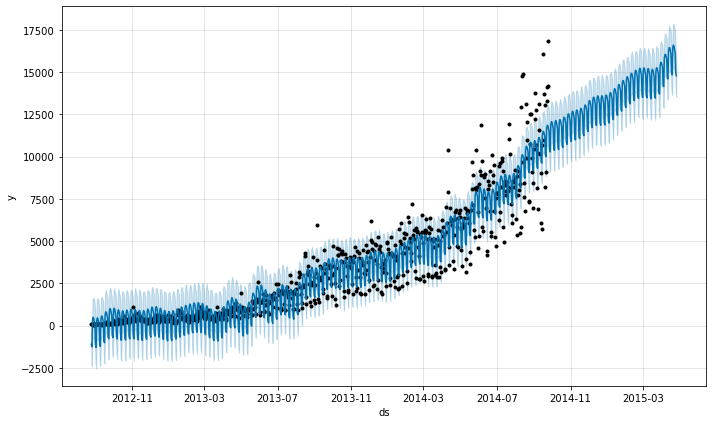

In [4]:
# 拟合模型
model = Prophet(daily_seasonality=True,seasonality_prior_scale=0.1)
model.fit(df)

# 构建待预测日期数据框，periods = 213
future = model.make_future_dataframe(periods=213)
#print(future.tail())

# 预测数据集
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
model.plot(forecast)
plt.show()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


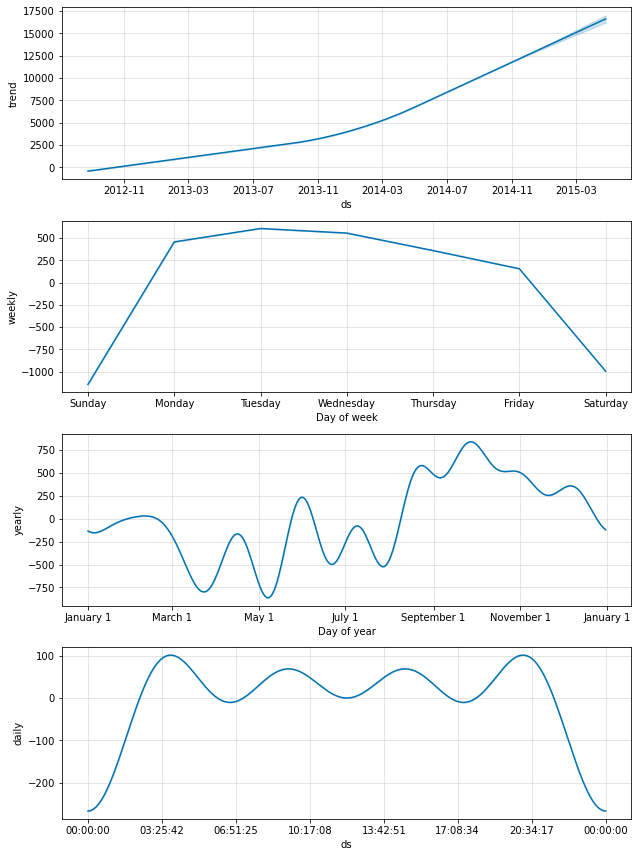

In [5]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forecast)
print(forecast.columns)